In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Let's create the synthetic data points

from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_features=2,n_samples=1000,n_targets=1,noise=3.0,random_state=42)

In [4]:
X

array([[-0.16711808,  0.14671369],
       [-0.02090159,  0.11732738],
       [ 0.15041891,  0.364961  ],
       ...,
       [ 0.30263547, -0.75427585],
       [ 0.38193545,  0.43004165],
       [ 0.07736831, -0.8612842 ]])

In [5]:
y

array([-8.58360648e+00, -3.85693552e+00,  1.13055635e+01,  1.82456767e+01,
       -7.88116908e+00, -3.53502722e+01, -4.16119853e+01, -6.06685136e+01,
        6.40593596e-01, -5.54960535e+01,  3.81242108e+01, -6.00955690e+01,
       -2.12775840e+01, -3.00886583e+01,  3.21957138e+01,  8.19831490e+00,
       -1.21934033e+01, -3.88159545e+01, -1.86588285e+01,  7.94554336e+01,
        2.58884764e+01, -4.19296465e+01, -3.73840117e+01, -4.71212909e+01,
       -5.06334209e+01, -3.78431781e+01,  5.85072616e+00,  7.04811608e+01,
        8.88902197e+01, -1.39862153e+01, -2.45949909e+01, -6.03693589e+00,
        1.84121155e+01,  2.35783851e+01, -9.03291187e+00, -4.16848331e+00,
        4.75454044e+01, -3.30411777e+01,  4.82834151e+01, -4.54365318e+01,
       -4.20693869e+01, -1.20295639e+01,  5.35861098e+01,  3.31883897e+01,
        3.99413518e+00, -2.38261357e+01,  1.03155182e+01,  1.27454640e+01,
       -1.09637842e+01,  2.16798615e+01,  6.80112450e+01,  1.94995177e+01,
       -6.19744835e+01,  

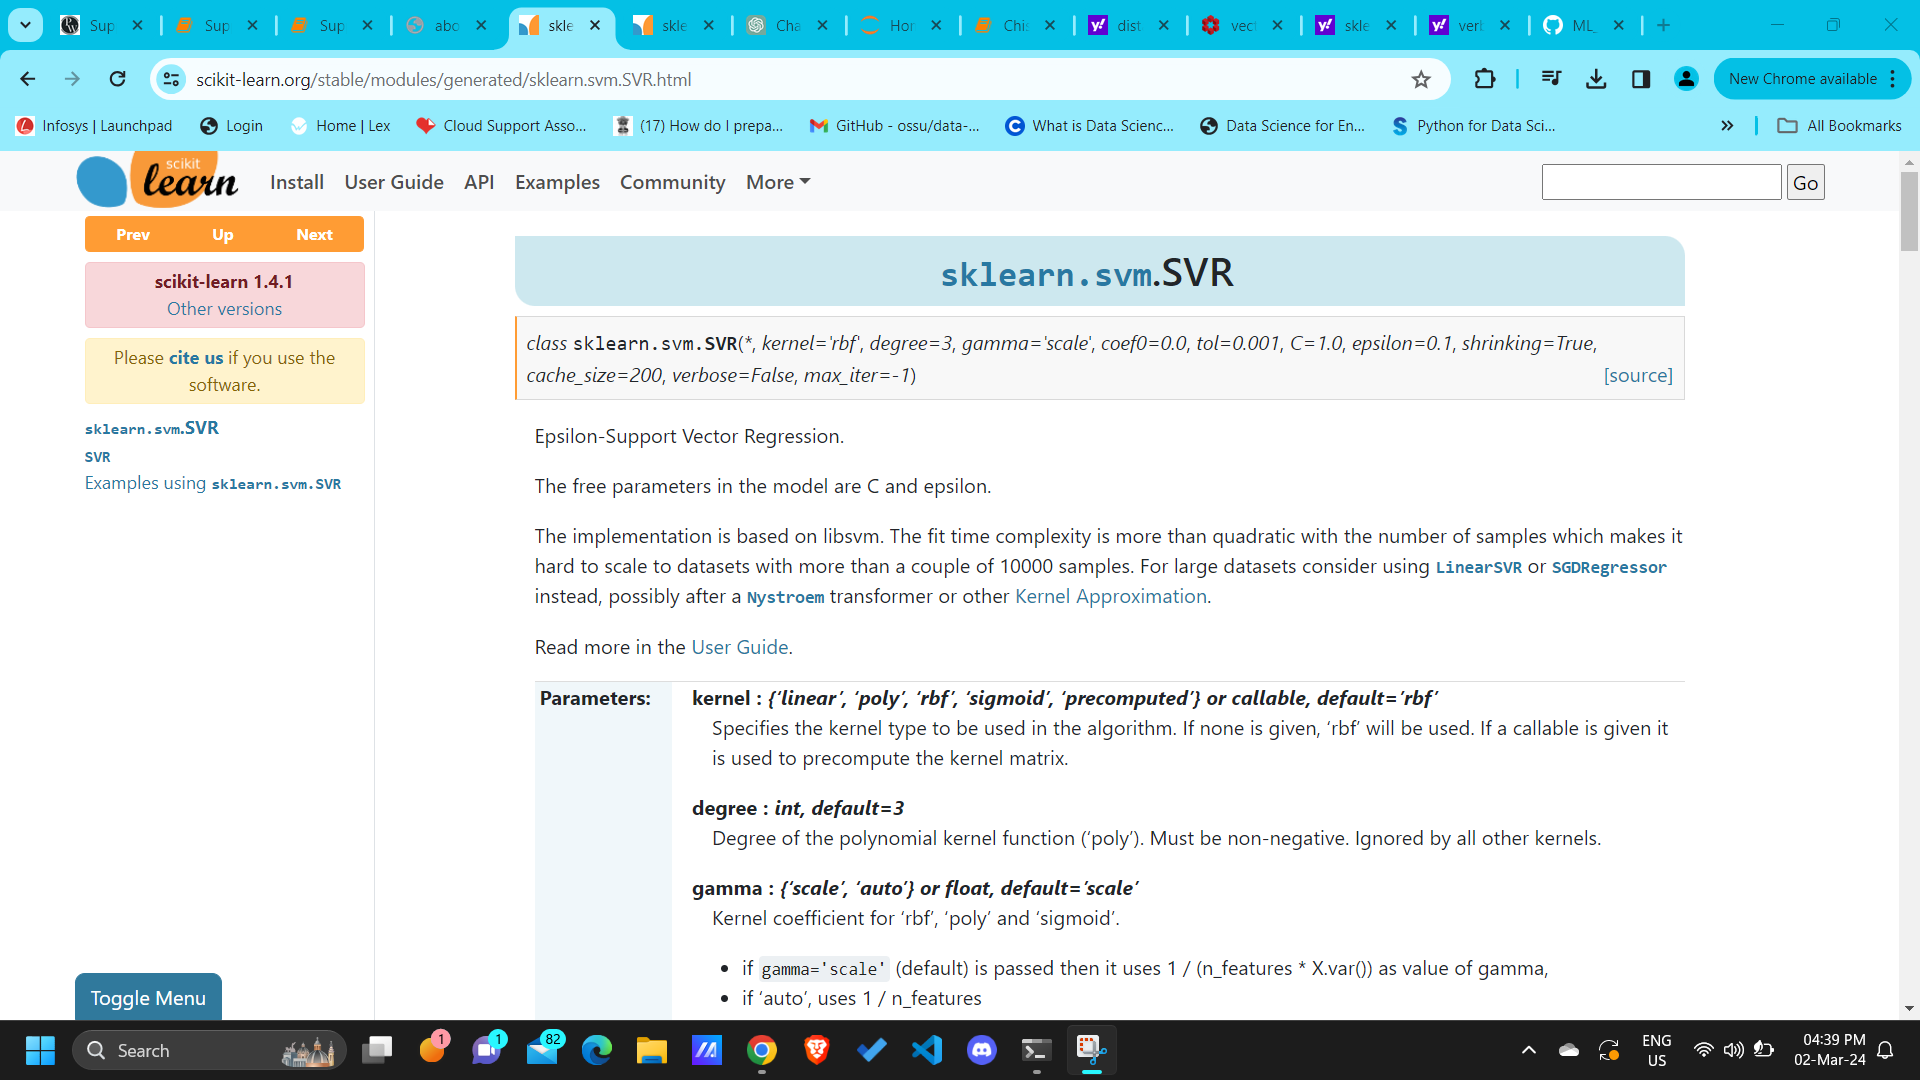

In [6]:
pd.DataFrame(X) # The value under the X

,0,1
0,-0.167118,0.146714
1,-0.020902,0.117327
2,0.150419,0.364961
3,0.555604,0.089581
4,0.058209,-1.142970
...,...,...
995,-0.753965,-0.280675
996,-2.172670,0.847422
997,0.302635,-0.754276
998,0.381935,0.430042


In [7]:
pd.DataFrame(y) # The values under y

,0
0,-8.583606
1,-3.856936
2,11.305564
3,18.245677
4,-7.881169
...,...
995,-32.737693
996,-79.317794
997,6.117221
998,25.667688


<Axes: xlabel='0', ylabel='1'>

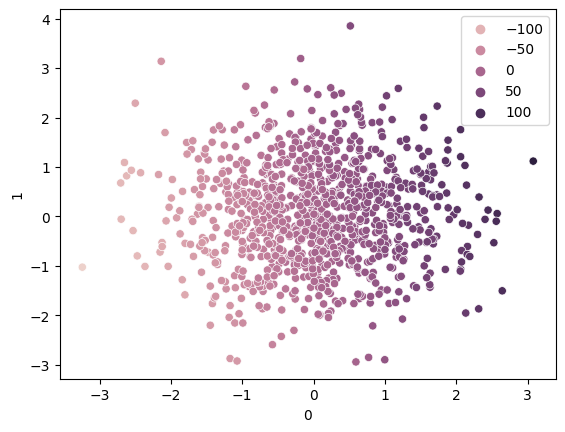

In [8]:
# Let's draw an scatter plot to understand how the data scattered

sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

<Axes: xlabel='0'>

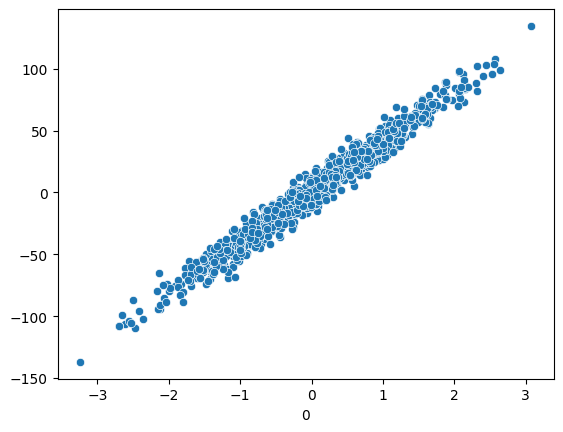

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=y)
# feature X[0] is linearly correlated with output

<Axes: xlabel='1'>

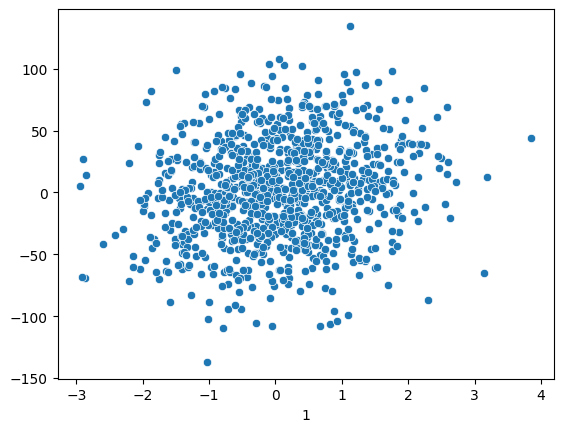

In [10]:
sns.scatterplot(x=pd.DataFrame(X)[1],y=y)


In [11]:
df=pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1)

In [12]:
df

,0,1,0
0,-0.167118,0.146714,-8.583606
1,-0.020902,0.117327,-3.856936
2,0.150419,0.364961,11.305564
3,0.555604,0.089581,18.245677
4,0.058209,-1.142970,-7.881169
...,...,...,...
995,-0.753965,-0.280675,-32.737693
996,-2.172670,0.847422,-79.317794
997,0.302635,-0.754276,6.117221
998,0.381935,0.430042,25.667688


In [13]:
df.columns=["feature1","feature2","target"]

In [14]:
df

,feature1,feature2,target
0,-0.167118,0.146714,-8.583606
1,-0.020902,0.117327,-3.856936
2,0.150419,0.364961,11.305564
3,0.555604,0.089581,18.245677
4,0.058209,-1.142970,-7.881169
...,...,...,...
995,-0.753965,-0.280675,-32.737693
996,-2.172670,0.847422,-79.317794
997,0.302635,-0.754276,6.117221
998,0.381935,0.430042,25.667688


In [15]:
df.corr()

# as observed the corr for feature 1 and target is 0.97 that is the reason scatter plot between feature1 and target is almost linear

,feature1,feature2,target
feature1,1.000000,0.002584,0.982807
feature2,0.002584,1.000000,0.171727
target,0.982807,0.171727,1.000000


<Axes: xlabel='0', ylabel='1'>

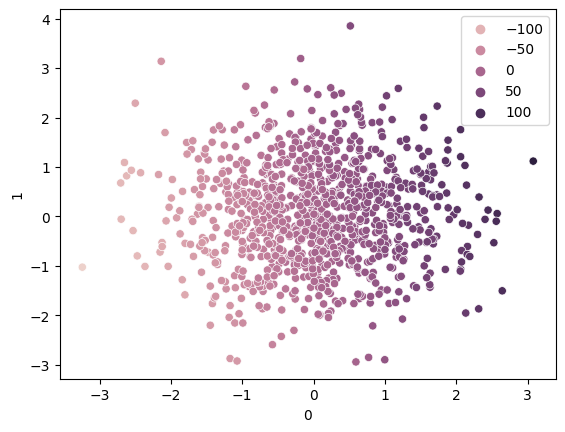

In [16]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

<Axes: xlabel='0'>

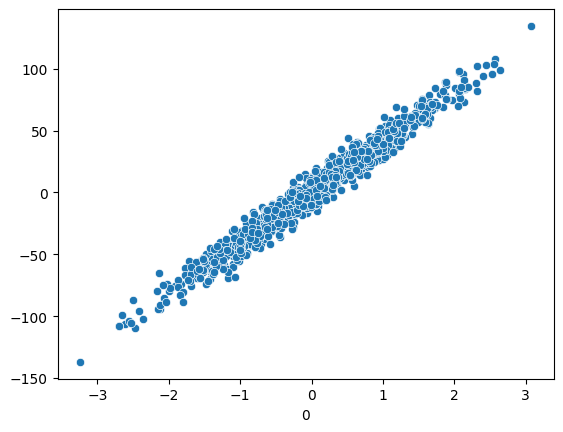

In [17]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=y)

In [18]:
# Let's perform train test spit

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [19]:
# model

from sklearn.svm import SVR

In [20]:
svr= SVR(kernel="linear")

In [21]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [22]:
svr.coef_ # we have two features so we got two coefficients

array([[40.65147278,  6.43813187]])

In [23]:
y_pred= svr.predict(X_test)

In [24]:
from sklearn.metrics import r2_score, accuracy_score

In [25]:
r2_score(y_pred,y_test)

0.9942918441792867

In [26]:
# we got high accuracy beacuse the data we took is already is sclaed and preprocessed data

## Hyperparameter tuning in SVR

In [27]:
from sklearn.model_selection import GridSearchCV

svr2= SVR(kernel="linear")

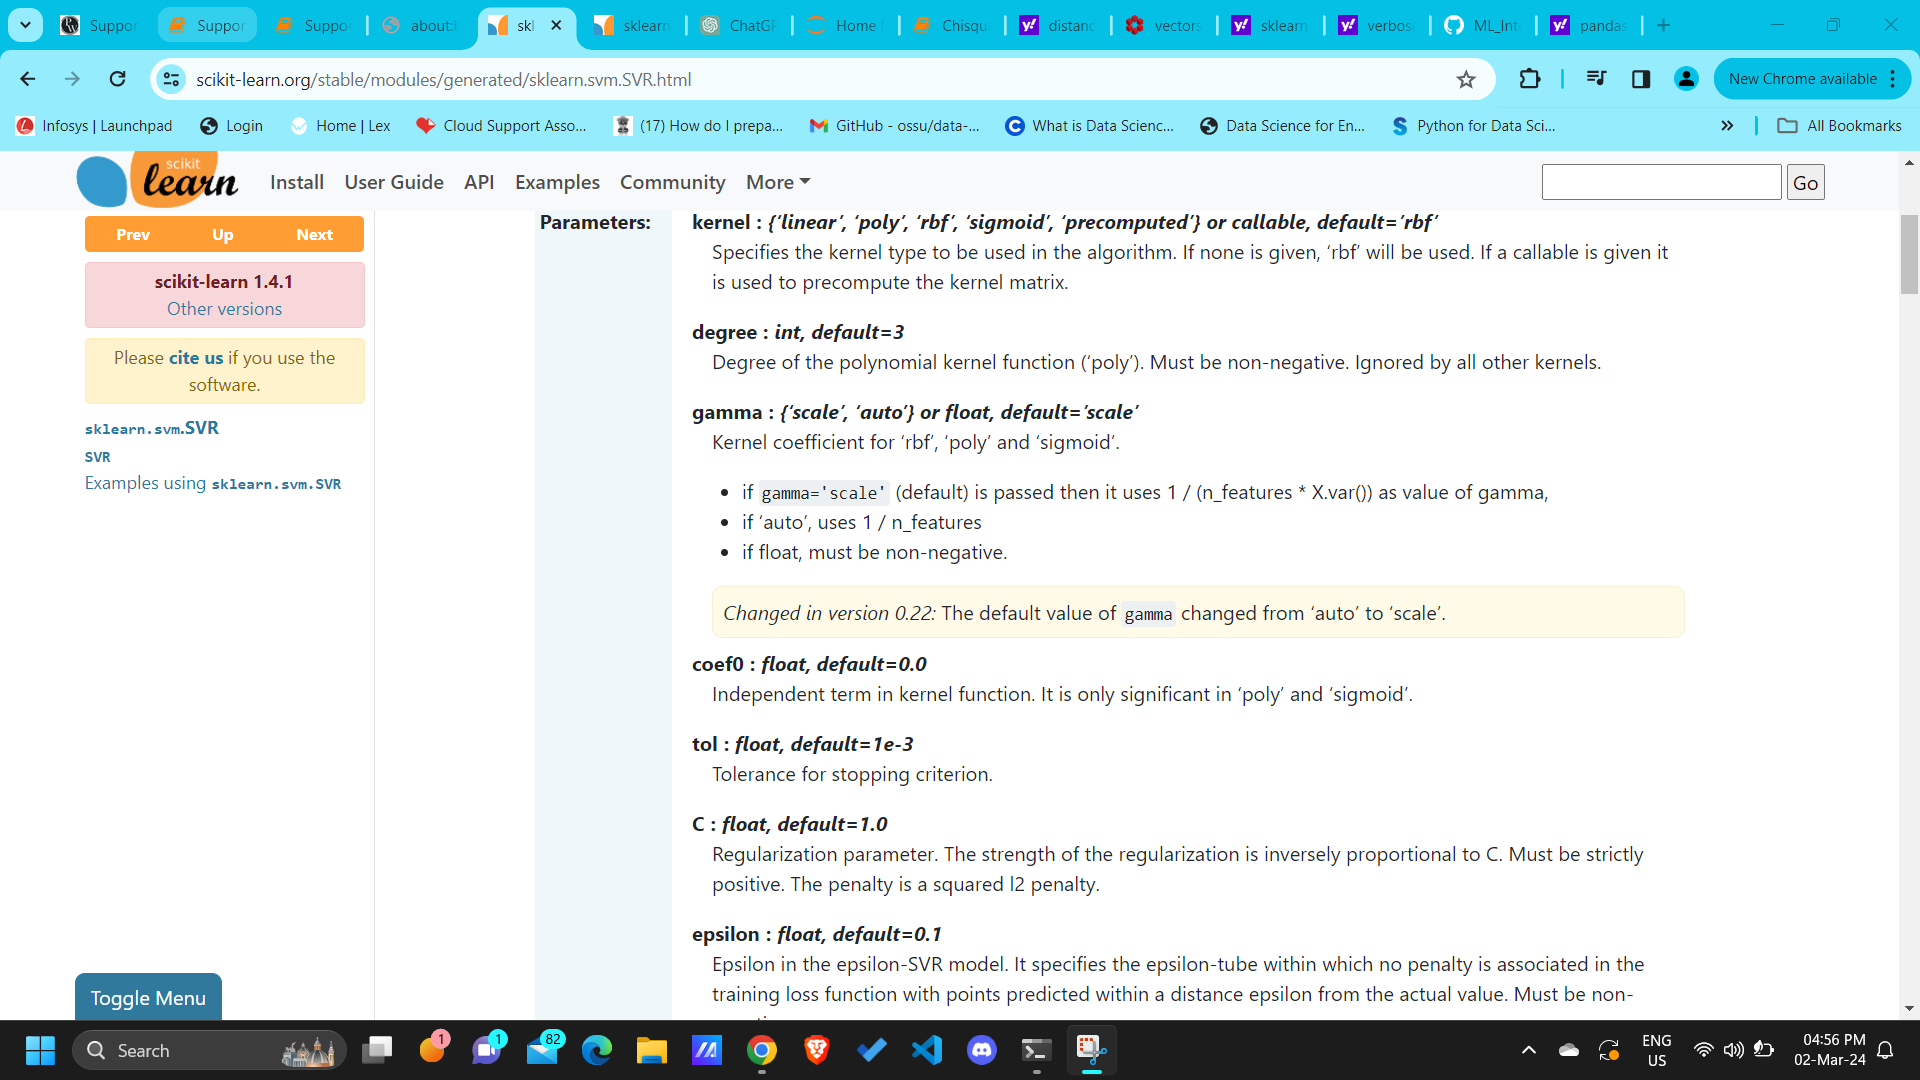

In [28]:
parameter={
    "C":[0.1,1,2,3,4,5,6,10,100],
    "gamma":[0,1,2,3,4,5,6,7,8,0.1,0.001,0.00001],
    "epsilon":[0.1,0.2,0.3,0.4],
    "kernel":["linear"]
}

In [29]:
grid=GridSearchCV(estimator=svr2,param_grid=parameter,cv=5,scoring="neg_mean_squared_error",refit=True,verbose=3)

In [30]:
grid

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 2, 3, 4, 5, 6, 10, 100],
                         'epsilon': [0.1, 0.2, 0.3, 0.4],
                         'gamma': [0, 1, 2, 3, 4, 5, 6, 7, 8, 0.1, 0.001,
                                   1e-05],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [31]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0, kernel=linear;, score=-28.699 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0, kernel=linear;, score=-41.023 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0, kernel=linear;, score=-47.256 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0, kernel=linear;, score=-40.812 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0, kernel=linear;, score=-27.207 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-28.699 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-41.023 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-47.256 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-40.812 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-27.207 total time=   0.0s
[CV 1/5] END C=0.1, epsilo

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.1, 1, 2, 3, 4, 5, 6, 10, 100],
                         'epsilon': [0.1, 0.2, 0.3, 0.4],
                         'gamma': [0, 1, 2, 3, 4, 5, 6, 7, 8, 0.1, 0.001,
                                   1e-05],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [32]:
grid.best_params_

{'C': 100, 'epsilon': 0.4, 'gamma': 0, 'kernel': 'linear'}

In [33]:
#evaluate the model using the above hyperparameters

model= SVR(C=100, epsilon=0.4, gamma=0,kernel="linear")

In [34]:
model.fit(X_train,y_train)

SVR(C=100, epsilon=0.4, gamma=0, kernel='linear')

In [35]:
y_pred=model.predict(X_test)

In [36]:
r2_score(y_pred,y_test)

0.9942537768564568

In [37]:
# the above and below will act as same because grid model also trained with same parameters

y_pred_grid=grid.predict(X_test)

In [38]:
r2_score(y_pred_grid,y_test)

0.9942537768564568